## Task-D: Collinear features and their effect on linear models

In [20]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')  


Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/task_d.csv")

In [5]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [8]:
X = data.drop(['target'], axis=1)
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [9]:
#LOGISTIC REGRESSION

data.corr()['target']

x            0.728290
y           -0.690684
z            0.969990
x*x          0.719570
2*y         -0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

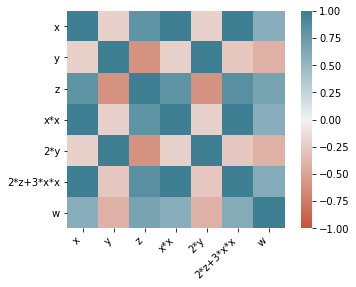

In [10]:
corr = X.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
statndard_X = scaler.fit_transform(X)
LR = SGDClassifier(loss='log')
LR.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
params ={'alpha': np.logspace(-10, 1, 400)}
clf = GridSearchCV(LR,params)
clf.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1...
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273

In [13]:
best_model = clf.best_params_
print(best_model)
best_model = SGDClassifier(alpha=1.0655379505623064e-10, loss = 'log')
best_model.fit(X,Y)

{'alpha': 1.0655379505623064e-10}


SGDClassifier(alpha=1.0655379505623064e-10, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
from sklearn.metrics import accuracy_score
pred = best_model.predict(X)
best_model_accuracy = accuracy_score(Y,pred)
print(best_model_accuracy)

1.0


In [15]:

weights_lr = best_model.coef_
print(weights_lr)


[[ 494.53650476 -751.08226237 1223.4584557   402.3174775  -751.08226237
   509.80024762  516.24744816]]


In [16]:
#SVM
SVM = SGDClassifier(loss = "hinge")
SVM.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
params ={'alpha': np.logspace(-10, 1, 400)}
clf_svm = GridSearchCV(SVM,params)
clf_svm.fit(X,Y)


GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0...
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273

In [25]:
best_model_svm = clf_svm.best_params_
print(best_model_svm)
best_model_svm = SGDClassifier(alpha=1e-10, loss = 'hinge')
best_model_svm.fit(X,Y)

{'alpha': 1.0655379505623064e-10}


SGDClassifier(alpha=1e-10, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
pred_svm = best_model_svm.predict(X)

best_model_accuracy_svm = accuracy_score(Y,pred)
print(best_model_accuracy_svm)
weights_svm = best_model_svm.coef_
print(weights_svm)

1.0
[[ 445.742857   -730.24197764  855.075875    383.37793441 -730.24197764
   448.27885518  258.08259753]]


In [27]:
new_x = np.add(X, 10 ** -2) 
scaler.fit_transform(new_x)

array([[-5.81065904e-01,  8.41837140e-01, -1.01297765e+00,
        -6.04024675e-01,  8.41837140e-01, -6.65926787e-01,
        -5.36277029e-01],
       [-8.94308978e-01, -2.07835104e-01, -1.01297765e+00,
        -8.83052126e-01, -2.07835104e-01, -9.17054076e-01,
        -5.22364042e-01],
       [-1.20755205e+00,  2.12033793e-01, -1.08231219e+00,
        -1.15091848e+00,  2.12033793e-01, -1.16650718e+00,
         2.05737674e-01],
       [-1.36417359e+00,  2.09934449e-03, -9.43643106e-01,
        -1.28066624e+00,  2.09934449e-03, -1.26653955e+00,
        -6.65719960e-01],
       [-7.37687441e-01,  1.05177159e+00, -1.01297765e+00,
        -7.44933538e-01,  1.05177159e+00, -7.92746068e-01,
        -7.35054120e-01],
       [-1.11201292e-01,  1.68157493e+00, -8.04974023e-01,
        -1.64556439e-01,  1.68157493e+00, -2.45288579e-01,
         4.89915854e-01],
       [-1.36417359e+00,  6.31902691e-01, -1.01297765e+00,
        -1.28066624e+00,  6.31902691e-01, -1.27491046e+00,
         3.6815590

In [28]:
LR.fit(new_x,Y)
params ={'alpha': np.logspace(-10, 1, 400)}
clf_new_LR = GridSearchCV(LR,params)
clf_new_LR.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1...
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273

In [29]:
best_model_LR_new = clf_new_LR.best_params_
print(best_model_LR_new)

{'alpha': 1.0655379505623064e-10}


In [31]:
best_model_LR_new = SGDClassifier(alpha=1e-10, loss = 'log')
best_model_LR_new.fit(X,Y)

SGDClassifier(alpha=1e-10, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
pred_new_lr = best_model_LR_new.predict(X)
best_model_accuracy_edited = accuracy_score(Y,pred_new_lr)
print(best_model_accuracy_edited)

1.0


In [33]:
weights_new_lr = best_model_LR_new.coef_
print(weights_new_lr)

[[ 353.86724862 -530.75360107  815.49725447  306.401798   -530.75360107
   374.22120723  317.90412858]]


In [34]:
#SVM After Noise
SVM.fit(new_x,Y)
params ={'alpha': np.logspace(-10, 1, 400)}
clf_svm_new = GridSearchCV(SVM,params)
clf_svm_new.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0...
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273

In [35]:
best_model_svm_new = clf_svm_new.best_params_
print(best_model_svm_new)

{'alpha': 1.0655379505623064e-10}


In [36]:
best_model_svm_new = SGDClassifier(alpha=1.0655379505623064e-10, loss = 'hinge')
best_model_svm_new.fit(X,Y)

SGDClassifier(alpha=1.0655379505623064e-10, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
pred_svm_new = best_model_svm_new.predict(X)
best_model_accuracy_svm_new = accuracy_score(Y,pred)
print(best_model_accuracy_svm_new)

1.0


In [38]:
weights_svm_new = best_model_svm_new.coef_
print(weights_svm_new)

[[ 550.35161545 -326.04614956  979.50047278  452.48096644 -326.04614956
   525.49427527  377.31179484]]


In [39]:
best_model_accuracy_edited-best_model_accuracy

0.0

In [40]:
best_model_accuracy_svm_new-best_model_accuracy_svm

0.0

In [41]:
Weight_diff_LR = weights_lr-weights_new_lr

In [42]:
Weight_diff_SVM = abs(weights_svm-weights_svm_new)

In [43]:
columns = list(data.columns)
for index in np.argsort(-Weight_diff_LR).reshape(-1)[:4]:  #TOP 4 FETAURES WRT TO DEVIATION FOR LR
    print(columns[index])

z
w
x
2*z+3*x*x


In [ ]:
Observations:Based on the study above, we can see that the weight changes drastically before and after noise is added to the data. This indicates that there is multicolinearity in the data. It is important to note that multicolinearity does not affect models accuracy (as shown above) but The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model

Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of our regression model.

We can have a model with severe multicollinearity and yet some variables in the model can be completely unaffected.

We cannot use these weight vectors for feature importance directly.
